In [1]:
#importamos la bibliotecas 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
#Esteblecermos el universo de las variables 

# Variables de Entrada
# ==========================
# luz exterior -> [0, 100]
# temperatura -> [0,100]
# ==========================

#Variable de salida 
# ==========================
# potenciaFoco -> [0, 100]  
# ==========================


#con respecto a la salida del tipo sugeno podemos tener en 
# cuenta que los valores serian  
# potenciaFoco ->[0, 50, 100]
# y en mandami 
# potenciaFoco -> [Apagado - medioEncendido - Encendido]
#Apagado        = [-273, 0.566, 75]
#medioEncendido = [50, 135, 200]
#Encendido      = [200, 250, 250]

In [4]:
x_luz =np.arange(0, 100, 1)
x_temperatura =np.arange(0, 100, 1)
#===================================================================
#en este caso dado que la intencidad sera controlada por medio de un 
#actuador se transforma la salida a conrde al sistema binaria
#de la misma forma que se haria con un arduino para el control de luces led
#===================================================================
x_potenciaFoco =np.arange(0, 255, 1)

In [5]:
#ahora vamos a generar las funcinoes de membresia difusa

# Variables de Entrada

# ==========================
# luz exterior -> [baja , ambiente , alta]
#recordemos que en esta variable tenemos del tipo trapezoidal y triangular
# ==========================

LB = fuzz.trapmf(x_luz,[-30.24, -9.76, 9.76, 30.24])
LAB = fuzz.trimf(x_luz,[10, 50, 90])
LA = fuzz.trapmf(x_luz,[70, 85, 100, 100])

# ==========================
# temperatura -> [frio , ambiente , caliente]
# ==========================

TF = fuzz.trapmf(x_temperatura,[-26.1, -4.56, 8.98, 19.97])
TA = fuzz.trimf(x_temperatura,[16, 28, 40])
TC = fuzz.trapmf(x_temperatura,[35, 50, 100, 100])

#Variable de Salida
# ==========================
# potenciaFoco -> [Apagado - medioEncendido - Encendido]
# ==========================
Apagado = fuzz.trimf(x_potenciaFoco,[-273, 0.566, 75])
medioEncendido = fuzz.trimf(x_potenciaFoco,[50, 135, 200])
Encendido = fuzz.trimf(x_potenciaFoco,[200, 250, 250])

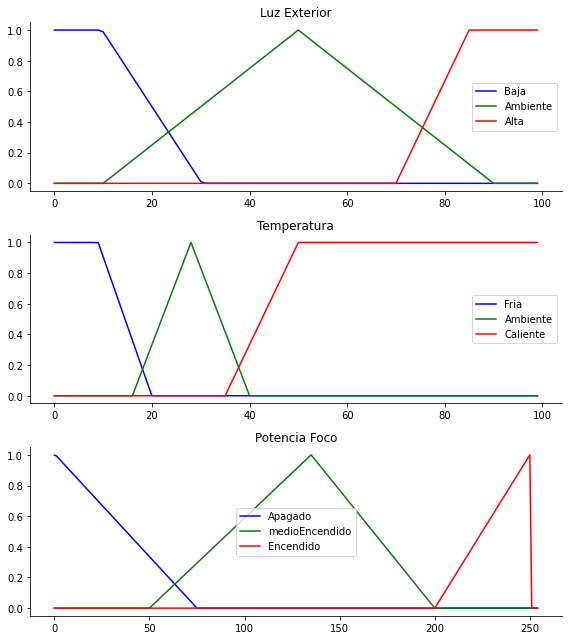

In [8]:
#ahora visualizaremos el universo y las funciones de membresia 

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_luz, LB,'b', linewidth=1.5, label='Baja')
ax0.plot(x_luz, LAB,'g', linewidth=1.5, label='Ambiente')
ax0.plot(x_luz, LA,'r', linewidth=1.5, label='Alta')
ax0.set_title('Luz Exterior')
ax0.legend()

ax1.plot(x_temperatura, TF,'b', linewidth=1.5, label='Fria')
ax1.plot(x_temperatura, TA,'g', linewidth=1.5, label='Ambiente')
ax1.plot(x_temperatura, TC,'r', linewidth=1.5, label='Caliente')
ax1.set_title('Temperatura')
ax1.legend()

ax2.plot(x_potenciaFoco, Apagado,'b', linewidth=1.5, label='Apagado')
ax2.plot(x_potenciaFoco, medioEncendido,'g', linewidth=1.5, label='medioEncendido')
ax2.plot(x_potenciaFoco, Encendido,'r', linewidth=1.5, label='Encendido')
ax2.set_title('Potencia Foco')
ax2.legend()

for ax in (ax0,ax1,ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [9]:
# ahora solo tenemos que defirnir la relación difusa entre las variables
# de entrada y salida cosideraremos las siguientes reglas

#==============================================================================================================================
#                                                          REGLAS DIFUSAS
#==============================================================================================================================
# 1.- si la LuxExterna es baja y la temperatura es fria entonces la potencia del foco es encendido
# 2.- si la LuxExterna es baja y la temperatura es temperatura ambiente, entonces la potencia del foco es medioEncendido
# 3.- si la LuxExterna es baja y la temperatura es caliente, entonces la potencia del foco es medioEncendido
#______________________________________________________________________________________________________________________________
# 4.- si la LuxExterna es luzAmbiente y la temperatura es fria entonces la potencia del foco es medioEncedido
# 5.- si la LuxExterna es luzAmbiente y la temperatura es temperatura ambiente entonces la potencia del foco es medioEncedido
# 6.- si la LuxExterna es luzAmbiente y la temperatura es caliente entonces la potencia del foco es Apagado
#______________________________________________________________________________________________________________________________
# 7.- si la LuxExterna es Alta y la temperatura es fria entonces la potencia del foco es medioEncedido
# 8.- si la LuxExterna es Alta y la temperatura es temperatura ambiente entonces la potencia del foco es Apagado
# 9.- si la LuxExterna es Alta y la temperatura es caliente entonces la potencia del foco es Apagado
#==============================================================================================================================

In [17]:
#Seguimos con la aplicacion de las reglas
# para realizar la pruebas le asignaremos valores a la temperatura y a la temperatura y luz exterior 
Luz_Exterior = 10
Temperatura = 10

luz_nivel_bajo = fuzz.interp_membership(x_luz, LB, Luz_Exterior)
luz_nivel_medio = fuzz.interp_membership(x_luz, LAB, Luz_Exterior)
luz_nivel_alto = fuzz.interp_membership(x_luz, LA, Luz_Exterior)

temp_nivel_bajo = fuzz.interp_membership(x_temperatura, TF, Temperatura)
temp_nivel_medio = fuzz.interp_membership(x_temperatura, TA, Temperatura)
temp_nivel_alto = fuzz.interp_membership(x_temperatura, TC, Temperatura)

El color azul  -> Apagado
El color verde -> Medio Encendido
El color Rojo  -> Encendido
La luz exterior es de: 10
La temperatura es de:  10


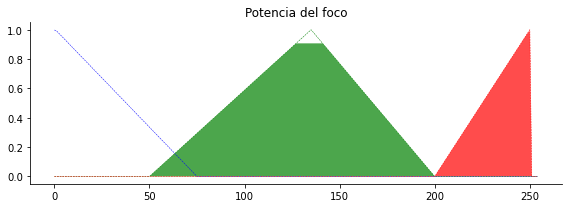

In [21]:
#ahora tomaremos las reglas que mencionamos antes, el operado or indica que se tomara la mayor
#======================================================================
#para la regla 1
active_rule1 = np.fmax(luz_nivel_bajo, temp_nivel_bajo)
potenciaFoco_activation_al = np.fmin(active_rule1, Encendido)
#======================================================================
#para la regla 2
active_rule2 = np.fmax(luz_nivel_bajo, temp_nivel_medio)
potenciaFoco_activation_me = np.fmin(active_rule2, medioEncendido)
#======================================================================
#para la regla 3
active_rule3 = np.fmax(luz_nivel_bajo, temp_nivel_alto)
potenciaFoco_activation_me = np.fmin(active_rule3, medioEncendido)
#======================================================================
#para la regla 4
active_rule4 =np.fmax(luz_nivel_medio, temp_nivel_bajo)
potenciaFoco_activation_me = np.fmin(active_rule4, medioEncendido)
#======================================================================
#para la regla 5
active_rule5 =np.fmax(luz_nivel_medio, temp_nivel_medio)
potenciaFoco_activation_me = np.fmin(active_rule5, medioEncendido)
#======================================================================
#para la regla 6
active_rule6 =np.fmax(luz_nivel_medio, temp_nivel_alto)
potenciaFoco_activation_ba = np.fmin(active_rule6, Apagado)
#======================================================================
#para la regla 7
active_rule7 = np.fmax(luz_nivel_alto, temp_nivel_bajo)
potenciaFoco_activation_me = np.fmin(active_rule7, medioEncendido)
#======================================================================
#para la regla 8
active_rule8 = np.fmax(luz_nivel_alto, temp_nivel_medio)
potenciaFoco_activation_ba = np.fmin(active_rule8, Apagado)
#======================================================================
#para la regla 9
active_rule9 = np.fmax(luz_nivel_alto, temp_nivel_alto)
potenciaFoco_activation_ba = np.fmin(active_rule9, Apagado)
#======================================================================


potencia0 = np.zeros_like(x_potenciaFoco)

#visualizamos esto

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_potenciaFoco, potencia0, potenciaFoco_activation_ba, facecolor='b', alpha=0.7)
ax0.plot(x_potenciaFoco, Apagado, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_potenciaFoco, potencia0, potenciaFoco_activation_me, facecolor='g', alpha=0.7)
ax0.plot(x_potenciaFoco, medioEncendido, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_potenciaFoco, potencia0, potenciaFoco_activation_al, facecolor='r', alpha=0.7)
ax0.plot(x_potenciaFoco, Encendido, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Potencia del foco')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

print('===================================')
print('El color azul  -> Apagado')
print('El color verde -> Medio Encendido')
print('El color Rojo  -> Encendido')
print('===================================')
print('La luz exterior es de:',Luz_Exterior)
print('La temperatura es de: ',Temperatura)

Text(0.5, 1.0, 'Aggregated membership and result (line)')

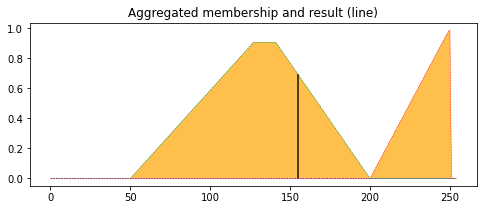

In [23]:
#Defuzzificación

#Agregamos los resultados al arbol de salida
aggregated = np.fmax(potenciaFoco_activation_ba,
                     np.fmax(potenciaFoco_activation_me, potenciaFoco_activation_al))

#calculamos los resultados de la defuzzicacion 
potenciaFoco = fuzz.defuzz(x_potenciaFoco, aggregated, 'centroid')
potenciaFoco_activation = fuzz.interp_membership(x_potenciaFoco, aggregated, potenciaFoco)


#vamos a visualizar esto
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_potenciaFoco, potenciaFoco_activation_ba, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_potenciaFoco, potenciaFoco_activation_me, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_potenciaFoco, potenciaFoco_activation_al, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_potenciaFoco, potencia0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([potenciaFoco, potenciaFoco], [0, potenciaFoco_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')